# Построение графиков с помощью Matplotlib

## Графики для представления данных

При работе с данными бывает удобно посмотреть визуализацию. Самым популярным инструментом является библиотека Matplotlib

## Установка

Matplotlib устанавлисается стандартным способом:

In [2]:
# !pip install matplotlib

## Подключим Matplotlib в ноутбук

Перед импортом вставим ячейку с командой %matplotlib inline, чтобы графики более аккуратно встраивались в ноутбук.

In [1]:
%matplotlib inline


Для работы мы будем использовать модуль matplotlib.pyplot как самый простой способ нарисовать график.


In [73]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import random

## Нарисуем простой график

Самый простой график - это прямая линия. Возьмем два набора точек при помощи range и нарисуем график.

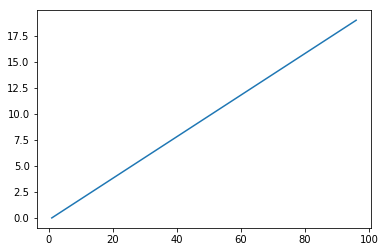

In [22]:
data_x1 = range(1, 100, 5)
data_y1 = range(0, 20)
plt.plot(data_x1, data_y1)
plt.show()

В питоне есть модуль random при помощи которого можно работать со случайными числами. 
Сделаем данные для x и y случайными:

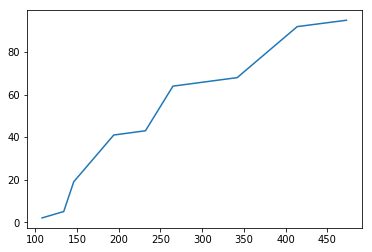

In [23]:
data_x2 = random.sample(range(500), 10)
data_x2.sort()
data_y2 = random.sample(range(100), 10)
data_y2.sort()
plt.plot(data_x2, data_y2)
plt.show()

## Нарисуем несколько графиков

Если мы вызовем plt.plot несколько раз, все линии будут нанесены на один график. Чтобы разделить графики нужно вызвать plt.figure()

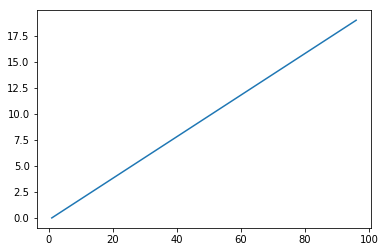

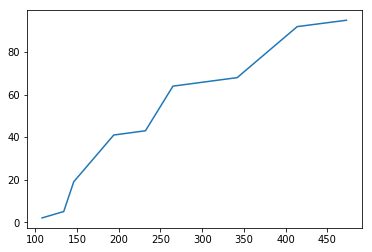

In [24]:
plt.plot(data_x1, data_y1)
plt.figure()
plt.plot(data_x2, data_y2)
plt.show()

## Цвета и сталь линий

Мы можем задавать дополнительные параметры для линий:

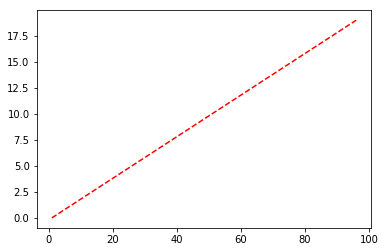

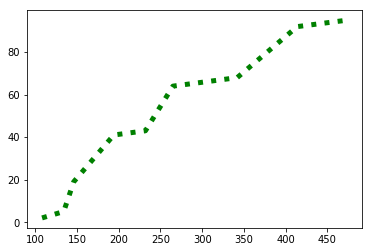

In [35]:
plt.plot(data_x1, data_y1, color='red', linestyle='dashed')
plt.figure()
plt.plot(data_x2, data_y2, color='green', linestyle='dotted', linewidth=5)
plt.show()

## Круговая диаграмма

Она же Pie chart, рисуется с использованием plt.pie. Для примера возьмем датасет с остановками:

In [42]:
stations = pd.read_csv(open('bas_stops.csv', 'r', encoding='cp1251'), sep=';')
stations.head()

,ID,Name,Longitude_WGS84,Latitude_WGS84,Street,AdmArea,District,RouteNumbers,StationName,Direction,Pavilion,OperatingOrgName,EntryState,global_id,geoData,Unnamed: 15
0,7,"«Дербеневская наб.», 3-й Дербеневский переулок...",37.655164,55.725668,3-й Дербеневский переулок,Южный административный округ,Даниловский район,А13; А632,Дербеневская наб.,NaN,да,ГУП «Мосгортранс»,активна,889076457,"{type=Point, coordinates=[37.6551636, 55.72566...",NaN
1,11,"«Наб. Тараса Шевченко», набережная Тараса Шевч...",37.572409,55.749444,набережная Тараса Шевченко,Западный административный округ,район Дорогомилово,А91,Наб. Тараса Шевченко,NaN,да,ЗАО «Валль-СНГ»,активна,889076459,"{type=Point, coordinates=[37.57240854, 55.7494...",NaN
2,12,"«Наб. Тараса Шевченко», набережная Тараса Шевч...",37.572716,55.749761,набережная Тараса Шевченко,Западный административный округ,район Дорогомилово,А157; А474; А840; А91,Наб. Тараса Шевченко,NaN,да,ЗАО «Валль-СНГ»,активна,889076460,"{type=Point, coordinates=[37.57271647, 55.7497...",NaN
3,27,"«ВКНЦ», 3-я Черепковская улица (27)",37.375509,55.757264,3-я Черепковская улица,Западный административный округ,район Кунцево,А660; А798; А816,ВКНЦ,NaN,да,ГУП «Мосгортранс»,активна,889076461,"{type=Point, coordinates=[37.37550932, 55.7572...",NaN
4,33,"«Новосущевская ул.», улица Сущёвский Вал (33)",37.603376,55.792891,улица Сущёвский Вал,Северо-Восточный административный округ,район Марьина Роща,А126; А384; Тб42; А84; А84К; АТ18,Новосущевская ул.,NaN,да,ЗАО «Валль-СНГ»,активна,889076463,"{type=Point, coordinates=[37.60337594, 55.7928...",NaN


In [46]:
pavilion_count = stations.groupby('Pavilion').size()
pavilion_count

Pavilion
да     8500
нет    2815
dtype: int64

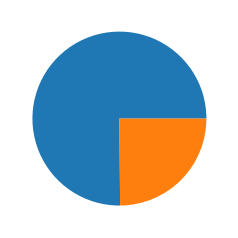

In [54]:
plt.pie(pavilion_count)
plt.show()

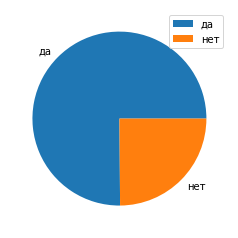

In [57]:
plt.pie(pavilion_count, labels=pavilion_count.index)
plt.legend()
plt.show()

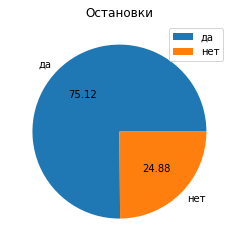

In [53]:
plt.pie(pavilion_count, labels=pavilion_count.index, autopct='%.2f')
plt.title('Остановки')
plt.legend()
plt.show()

## Гистограмма

In [61]:
admarea_count = stations.groupby('AdmArea').size()
admarea_count

AdmArea
Восточный административный округ           1413
Западный административный округ            1234
Зеленоградский административный округ       240
Новомосковский административный округ       451
Северный административный округ            1034
Северо-Восточный административный округ    1129
Северо-Западный административный округ      826
Троицкий административный округ             364
Центральный административный округ         1011
Юго-Восточный административный округ       1178
Юго-Западный административный округ        1069
Южный административный округ               1366
dtype: int64

In [69]:
labels_adm = ['ВАО', 'ЗАО', 'Зел', 'Нов', 'САО', 'СВАО', 'СЗАО', 'Тро', 'ЦАО', 'ЮВАО', 'ЮЗАО', 'ЮАО']

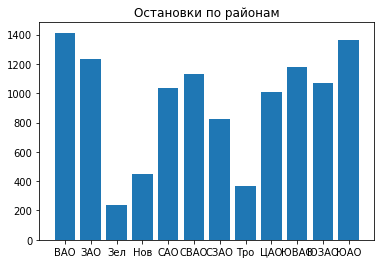

In [72]:
plt.bar(labels_adm, admarea_count)
plt.title('Остановки по районам')
plt.show()

## Цвета столбцов

В matplotlib есть несколько предопределенных цветовых наборов:
https://matplotlib.org/examples/color/colormaps_reference.html

In [75]:
cmap = get_cmap('tab20')
colors = [cmap(i) for i in range(len(labels))]
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0)]

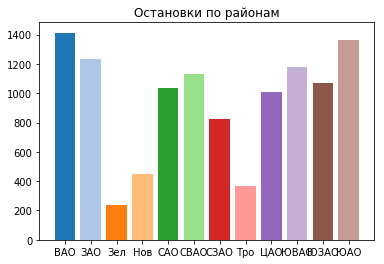

In [77]:
plt.bar(labels, admarea_count, color=colors)
plt.title('Остановки по районам')
plt.show()